<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/%C3%81rboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión

## Preparación de ambiente

### Carga de módulos

In [1]:
import pydotplus
import numpy as np
import pandas as pd
from sklearn.tree import _tree
from IPython.display import Image 
from sklearn.pipeline import Pipeline
from sklearn.externals.six import StringIO 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### Funciones relevantes

In [2]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    features = ','.join(feature_names)
    print(f"def tree({features}):")

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [3]:
def classification_metrics(X, y, estimator):
    ls_scores_roc = cross_val_score(estimator=estimator, X=X, y=y, scoring="roc_auc", n_jobs=-1, cv=4)
    print(f"ROC media: {np.mean(ls_scores_roc):,.2f}, desviación estándar: {np.std(ls_scores_roc)}")

## Carga de datos

### Lectura de datos

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/datasets/tictactoe.csv")

In [6]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


### EDA

In [7]:
df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
78,x,x,o,x,x,o,o,o,x,positive
705,x,b,x,x,x,o,o,o,o,negative
376,o,o,x,x,o,x,o,x,x,positive
578,b,o,b,x,x,x,o,o,x,positive
115,x,o,x,x,o,o,x,x,o,positive


In [8]:
df.shape

(958, 10)

### Separación de sets

In [9]:
X = df[[f"V{x}" for x in range(1, 10)]]
y = df["V10"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

## Modelado

### Generación de pipeline

In [11]:
ohe = OneHotEncoder(sparse=False)

In [12]:
ohe.fit_transform(df[[f"V{x}" for x in range(1, 10)]])

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [13]:
ohe.get_feature_names?

In [14]:
ohe.get_feature_names(X.columns)

array(['V1_b', 'V1_o', 'V1_x', 'V2_b', 'V2_o', 'V2_x', 'V3_b', 'V3_o',
       'V3_x', 'V4_b', 'V4_o', 'V4_x', 'V5_b', 'V5_o', 'V5_x', 'V6_b',
       'V6_o', 'V6_x', 'V7_b', 'V7_o', 'V7_x', 'V8_b', 'V8_o', 'V8_x',
       'V9_b', 'V9_o', 'V9_x'], dtype=object)

In [15]:
DecisionTreeClassifier?

In [16]:
tree = DecisionTreeClassifier(max_depth=3)

In [17]:
pipe = Pipeline([("encoder", ohe), ("tree", tree)])

### Entrenamiento

In [18]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('encoder',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', sparse=False)),
                ('tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=3,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [19]:
pipe.score(X_train, y_train)

0.7626865671641792

In [20]:
pipe.score(X_test, y_test)

0.7048611111111112

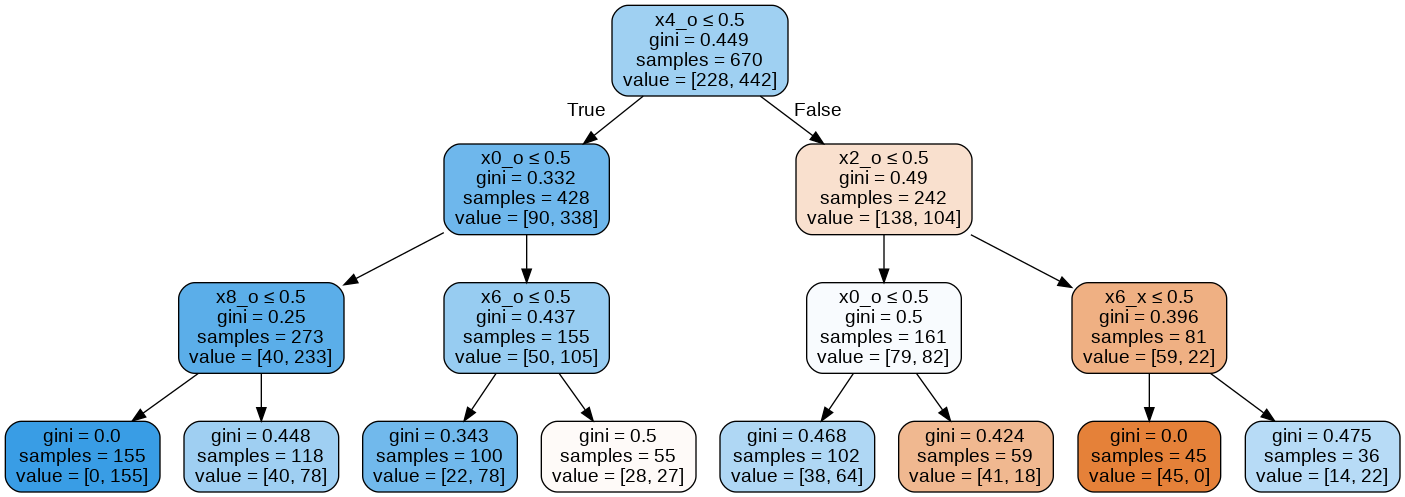

In [21]:
dot_data = StringIO()
export_graphviz(pipe["tree"], out_file=dot_data, feature_names=ohe.get_feature_names(),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
tree.classes_

array(['negative', 'positive'], dtype=object)

In [23]:
print(tree_to_code(feature_names=ohe.get_feature_names(), tree=tree))

def tree(x0_b,x0_o,x0_x,x1_b,x1_o,x1_x,x2_b,x2_o,x2_x,x3_b,x3_o,x3_x,x4_b,x4_o,x4_x,x5_b,x5_o,x5_x,x6_b,x6_o,x6_x,x7_b,x7_o,x7_x,x8_b,x8_o,x8_x):
  if x4_o <= 0.5:
    if x0_o <= 0.5:
      if x8_o <= 0.5:
        return [[  0. 155.]]
      else:  # if x8_o > 0.5
        return [[40. 78.]]
    else:  # if x0_o > 0.5
      if x6_o <= 0.5:
        return [[22. 78.]]
      else:  # if x6_o > 0.5
        return [[28. 27.]]
  else:  # if x4_o > 0.5
    if x2_o <= 0.5:
      if x0_o <= 0.5:
        return [[38. 64.]]
      else:  # if x0_o > 0.5
        return [[41. 18.]]
    else:  # if x2_o > 0.5
      if x6_x <= 0.5:
        return [[45.  0.]]
      else:  # if x6_x > 0.5
        return [[14. 22.]]
None


### Cross validation

In [24]:
classification_metrics(X=X_train, y=y_train, estimator=pipe)

ROC media: 0.79, desviación estándar: 0.034494268686163634


In [25]:
pipe.score(X_test, y_test)

0.7048611111111112

### Hyperparametrización

In [27]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [28]:
param_dist = {"tree__max_depth": range(1, 5),
              "tree__max_features": ["auto", "sqrt", "log2"],
              "tree__min_samples_leaf": [x/100 for x in range(5, 51, 1)] + [x for x in range(1, 21)], 
              "tree__criterion": ["gini", "entropy"],
              "tree__splitter": ["best", "random"],
              "tree__class_weight": ["balanced", None]}

In [29]:
search = GridSearchCV(param_grid=param_dist, cv=4, n_jobs=-1, scoring="roc_auc", estimator=pipe, verbose=5,)

In [ ]:
search.fit(X_train, y_train)

Fitting 4 folds for each of 6336 candidates, totalling 25344 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1904 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 4784 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 6656 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 8816 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 11264 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 14000 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 17024 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 20336 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 23936 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 25344 out of 25344 | elapsed:  1.6min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('encoder',
                                        OneHotEncoder(categories='auto',
                                                      drop=None,
                                                      dtype=<class 'numpy.float64'>,
                                                      handle_unknown='error',
                                                      sparse=False)),
                                       ('tree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=3,
                                                               max_features=None,
                                                  

In [ ]:
search.best_estimator_

Pipeline(memory=None,
         steps=[('encoder',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', sparse=False)),
                ('tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                                        criterion='entropy', max_depth=4,
                                        max_features='sqrt',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=7, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [ ]:
search.score(X_test, y_test)

0.8196658295320589

In [ ]:
search.best_score_

0.804278378273914

### Preservación de modelo

In [ ]:
pd.to_pickle(pipe, "/home/oscar/Documentos/Oscar/Diplomado/Generación 3/Módulo 2/tic_tac_toe/home/dt_tictactoe.pickle")

In [ ]:
X["proba"] = pipe.predict_proba(X)[:, 0]

In [ ]:
pd.DataFrame(zip(ohe.get_feature_names(X_train.columns), tree.feature_importances_)).sort_values(by=1)

,0,1
0,V1_b,0.000000
18,V7_b,0.000000
17,V6_x,0.000000
16,V6_o,0.000000
15,V6_b,0.000000
14,V5_x,0.000000
25,V9_o,0.000000
12,V5_b,0.000000
11,V4_x,0.000000
22,V8_o,0.000000


In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,proba
0,x,x,x,x,o,o,x,o,o,0.569231
1,x,x,x,x,o,o,o,x,o,0.569231
2,x,x,x,x,o,o,o,o,x,0.259259
3,x,x,x,x,o,o,o,b,b,0.569231
4,x,x,x,x,o,o,b,o,b,0.569231
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,0.259259
954,o,x,o,x,x,o,x,o,x,0.345133
955,o,x,o,x,o,x,x,o,x,0.388889
956,o,x,o,o,x,x,x,o,x,0.345133


In [ ]:
ohe

In [ ]:
ohe?

In [ ]:
X.to_csv("/home/oscar/Documentos/Oscar/Diplomado/Generación 3/Módulo 2/tic_tac_toe/home/tree_data.csv")